In [35]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('students_simple.csv')
display(df.head())

col1 = 12 % 5
col2 = (12 ** 2 % 5) + 5
col1, col2

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


(2, 9)

In [36]:
col1_name = "income"
col2_name = "test_time"

x_col = df[col1_name]
y_col = df[col2_name]


def fechner_correlation(x, y):
    x_median = np.mean(x)
    y_median = np.mean(y)

    x_signs = np.sign(x - x_median)
    y_signs = np.sign(y - y_median)

    matches = np.sum(x_signs == y_signs)
    mismatches = np.sum(x_signs != y_signs)

    fechner = (matches - mismatches) / (matches + mismatches)

    return fechner, matches, mismatches


def pearson_with_ci(x, y, alpha=0.95):
    pearson_corr, p_value = stats.pearsonr(x, y)

    n = len(x)
    z = np.arctanh(pearson_corr)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha) / 2)

    ci_lower = np.tanh(z - z_crit * se)
    ci_upper = np.tanh(z + z_crit * se)

    return pearson_corr, (ci_lower, ci_upper), p_value


def spearman_correlation(x, y):
    return stats.spearmanr(x, y)


def kendall_correlation(x, y):
    return stats.kendalltau(x, y)


print("РАСЧЕТ КОРРЕЛЯЦИЙ")
print("=" * 50)

# Фехнер
fechner_corr, matches, mismatches = fechner_correlation(x_col, y_col)
print(f"1. Коэффициент Фехнера: {fechner_corr:.4f}")
print(f"   Совпадения знаков: {matches}, Несовпадения: {mismatches}")

# Пирсон
pearson_corr, pearson_ci, pearson_p = pearson_with_ci(x_col, y_col)
print(f"\n2. Коэффициент Пирсона: {pearson_corr:.4f}")
print(f"   Доверительный интервал (95%): [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]")
print(f"   p-value: {pearson_p:.6f}")

# Спирмен
spearman_corr, spearman_p = spearman_correlation(x_col, y_col)
print(f"\n3. Коэффициент Спирмена: {spearman_corr:.4f}")
print(f"   p-value: {spearman_p:.6f}")

# Кенделл
kendall_corr, kendall_p = kendall_correlation(x_col, y_col)
print(f"\n4. Коэффициент Кенделла: {kendall_corr:.4f}")
print(f"   p-value: {kendall_p:.6f}")

РАСЧЕТ КОРРЕЛЯЦИЙ
1. Коэффициент Фехнера: -0.4000
   Совпадения знаков: 6, Несовпадения: 14

2. Коэффициент Пирсона: -0.5699
   Доверительный интервал (95%): [-0.8085, -0.1703]
   p-value: 0.008708

3. Коэффициент Спирмена: -0.5392
   p-value: 0.014161

4. Коэффициент Кенделла: -0.4362
   p-value: 0.007675


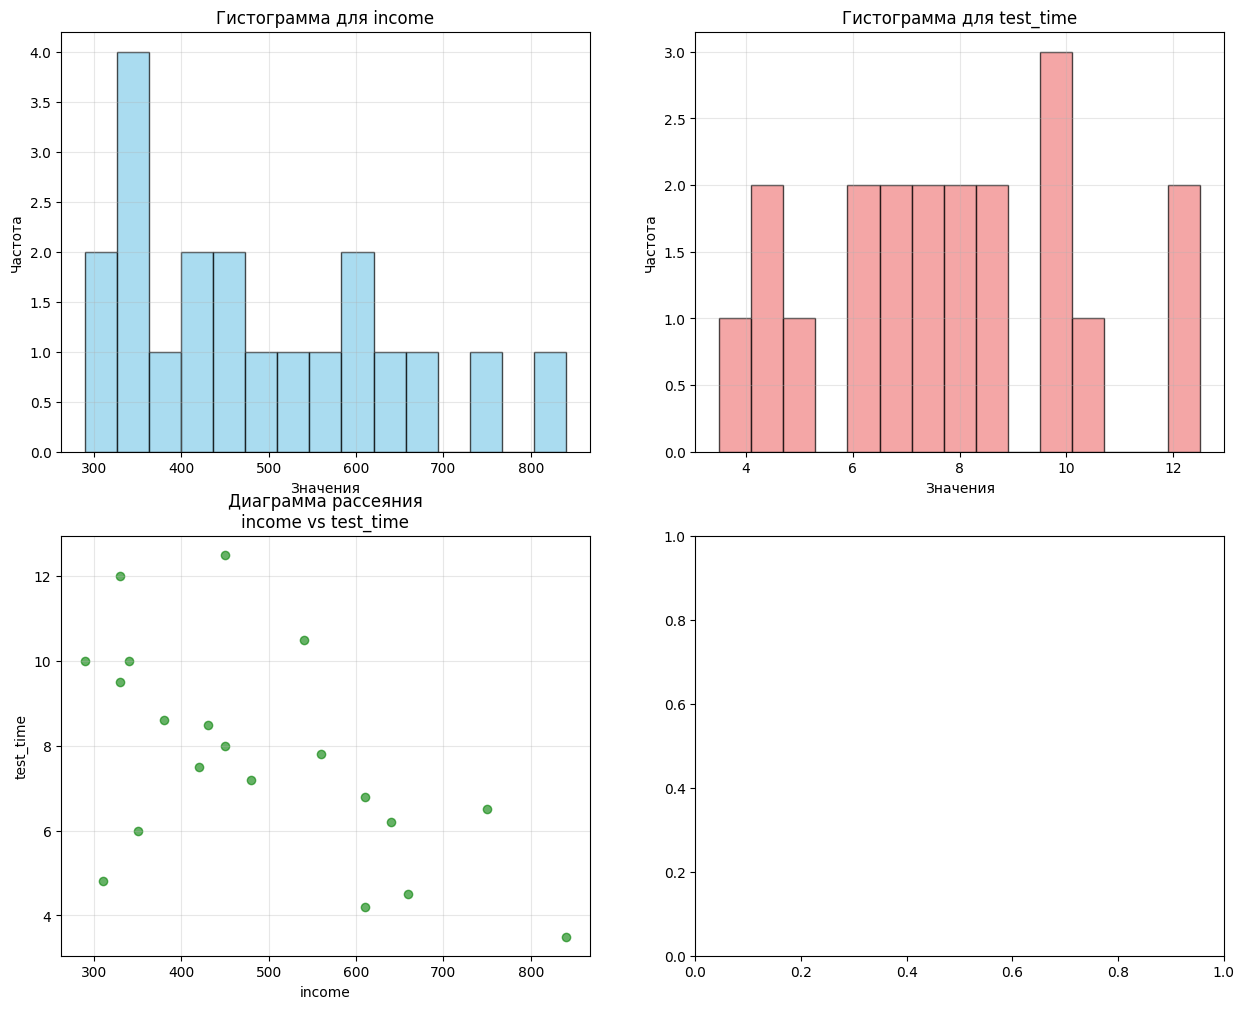

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(x_col, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title(f'Гистограмма для {col1_name}')
axes[0, 0].set_xlabel('Значения')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(y_col, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title(f'Гистограмма для {col2_name}')
axes[0, 1].set_xlabel('Значения')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True, alpha=0.3)

scatter = axes[1, 0].scatter(x_col, y_col, alpha=0.6, color='green')
axes[1, 0].set_title(f'Диаграмма рассеяния\n{col1_name} vs {col2_name}')
axes[1, 0].set_xlabel(col1_name)
axes[1, 0].set_ylabel(col2_name)
axes[1, 0].grid(True, alpha=0.3)


In [38]:

def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    w0 = y_mean - w1 * x_mean

    y_pred = w1 * x + w0

    residuals = y - y_pred

    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y - y_mean) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return w0, w1, y_pred, residuals, r_squared


def quadratic_regression(x, y):
    X = np.column_stack([x ** 2, x, np.ones(len(x))])

    w = np.linalg.inv(X.T @ X) @ X.T @ y
    w2, w1, w0 = w

    y_pred = w2 * x ** 2 + w1 * x + w0

    residuals = y - y_pred
    r_squared = 1 - (np.sum(residuals ** 2) / np.sum((y - np.mean(y)) ** 2))

    return w0, w1, w2, y_pred, residuals, r_squared


def hyperbolic_regression(x, y):
    x_transformed = 1 / x

    X = np.column_stack([x_transformed, np.ones(len(x))])
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    w1, w0 = w

    y_pred = w1 / x + w0

    residuals = y - y_pred
    r_squared = 1 - (np.sum(residuals ** 2) / np.sum((y - np.mean(y)) ** 2))

    return w0, w1, y_pred, residuals, r_squared


def exponential_regression(x, y):
    if np.any(y <= 0):
        y_positive = y - np.min(y) + 1
    else:
        y_positive = y

    y_log = np.log(y_positive)

    X = np.column_stack([x, np.ones(len(x))])
    w_log = np.linalg.inv(X.T @ X) @ X.T @ y_log

    ln_w1, ln_w0 = w_log
    w1 = np.exp(ln_w1)
    w0 = np.exp(ln_w0)

    if np.any(y <= 0):
        w0 = w0 * np.exp(-ln_w1 * (np.min(y) - 1))

    y_pred = w0 * (w1 ** x)

    residuals = y - y_pred
    r_squared = 1 - (np.sum(residuals ** 2) / np.sum((y - np.mean(y)) ** 2))

    return w0, w1, y_pred, residuals, r_squared


print("ПОСТРОЕНИЕ УРАВНЕНИЙ РЕГРЕССИИ")
print("=" * 50)

w0_lin, w1_lin, y_pred_lin, res_lin, r2_lin = linear_regression(x_col, y_col)
print(f"1. Линейная регрессия: y = {w1_lin:.4f} * x + {w0_lin:.4f}")
print(f"   R² = {r2_lin:.4f}")

w0_quad, w1_quad, w2_quad, y_pred_quad, res_quad, r2_quad = quadratic_regression(x_col, y_col)
print(f"\n2. Квадратичная регрессия: y = {w2_quad:.4f} * x² + {w1_quad:.4f} * x + {w0_quad:.4f}")
print(f"   R² = {r2_quad:.4f}")

w0_hyp, w1_hyp, y_pred_hyp, res_hyp, r2_hyp = hyperbolic_regression(x_col, y_col)
print(f"\n3. Гиперболическая регрессия: y = {w1_hyp:.4f} / x + {w0_hyp:.4f}")
print(f"   R² = {r2_hyp:.4f}")

w0_exp, w1_exp, y_pred_exp, res_exp, r2_exp = exponential_regression(x_col, y_col)
print(f"\n4. Показательная регрессия: y = {w0_exp:.4f} * {w1_exp:.4f}^x")
print(f"   R² = {r2_exp:.4f}")

ПОСТРОЕНИЕ УРАВНЕНИЙ РЕГРЕССИИ
1. Линейная регрессия: y = -0.0092 * x + 12.2089
   R² = 0.3248

2. Квадратичная регрессия: y = -0.0000 * x² + 0.0097 * x + 7.6017
   R² = 0.3542

3. Гиперболическая регрессия: y = 1832.3465 / x + 3.6149
   R² = 0.2428

4. Показательная регрессия: y = 14.1216 * 0.9987^x
   R² = 0.2880


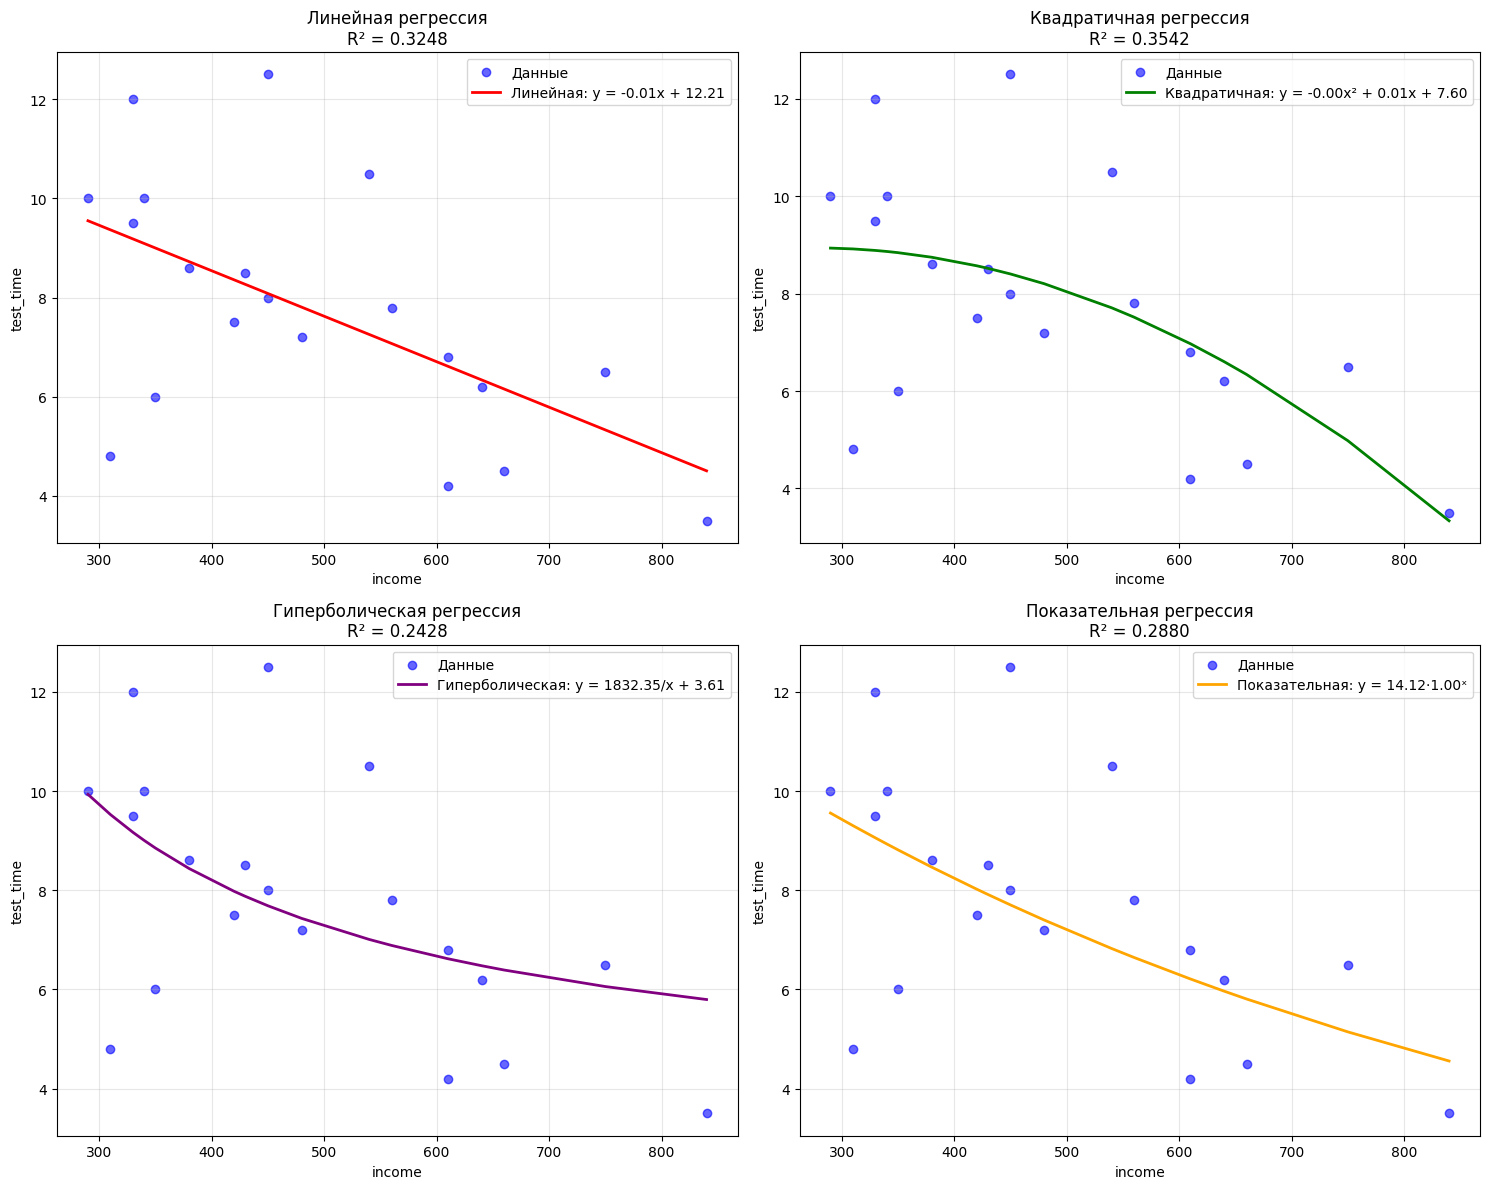

In [39]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sort_idx = np.argsort(x_col)
x_sorted = x_col[sort_idx]
y_sorted = y_col[sort_idx]

axes[0, 0].scatter(x_col, y_col, alpha=0.6, color='blue', label='Данные')
axes[0, 0].plot(x_sorted, y_pred_lin[sort_idx], 'r-', linewidth=2,
                label=f'Линейная: y = {w1_lin:.2f}x + {w0_lin:.2f}')
axes[0, 0].set_title(f'Линейная регрессия\nR² = {r2_lin:.4f}')
axes[0, 0].set_xlabel(col1_name)
axes[0, 0].set_ylabel(col2_name)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(x_col, y_col, alpha=0.6, color='blue', label='Данные')
axes[0, 1].plot(x_sorted, y_pred_quad[sort_idx], 'g-', linewidth=2,
                label=f'Квадратичная: y = {w2_quad:.2f}x² + {w1_quad:.2f}x + {w0_quad:.2f}')
axes[0, 1].set_title(f'Квадратичная регрессия\nR² = {r2_quad:.4f}')
axes[0, 1].set_xlabel(col1_name)
axes[0, 1].set_ylabel(col2_name)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(x_col, y_col, alpha=0.6, color='blue', label='Данные')
axes[1, 0].plot(x_sorted, y_pred_hyp[sort_idx], 'purple', linewidth=2,
                label=f'Гиперболическая: y = {w1_hyp:.2f}/x + {w0_hyp:.2f}')
axes[1, 0].set_title(f'Гиперболическая регрессия\nR² = {r2_hyp:.4f}')
axes[1, 0].set_xlabel(col1_name)
axes[1, 0].set_ylabel(col2_name)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(x_col, y_col, alpha=0.6, color='blue', label='Данные')
axes[1, 1].plot(x_sorted, y_pred_exp[sort_idx], 'orange', linewidth=2,
                label=f'Показательная: y = {w0_exp:.2f}·{w1_exp:.2f}ˣ')
axes[1, 1].set_title(f'Показательная регрессия\nR² = {r2_exp:.4f}')
axes[1, 1].set_xlabel(col1_name)
axes[1, 1].set_ylabel(col2_name)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:


import numpy as np
from scipy import stats


def fisher_test(y, y_pred, k, alpha=0.01):
    n = len(y)

    ss_reg = np.sum((y_pred - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)

    df_reg = k - 1
    df_res = n - k

    ms_reg = ss_reg / df_reg
    ms_res = ss_res / df_res

    F_stat = ms_reg / ms_res
    F_crit = stats.f.ppf(1 - alpha, df_reg, df_res)

    if F_stat > F_crit:
        conclusion = "Модель адекватна данным (F > Fкр)"
    else:
        conclusion = "Модель неадекватна данным (F ≤ Fкр)"

    print(f"F = {F_stat:.4f}")
    print(f"Fкр = {F_crit:.4f}")
    print(f"Вывод: {conclusion}")

    return F_stat, F_crit, conclusion


print("ПРОВЕРКА КРИТЕРИЕМ ФИШЕРА")
print("=" * 60)

print("1. ЛУЧШАЯ МОДЕЛЬ: ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ")
print("-" * 50)

k_hyp = 2
fisher_test(y_col, y_pred_hyp, k_hyp)

print("\n2. ХУДШАЯ МОДЕЛЬ: КВАДРАТИЧНАЯ РЕГРЕССИЯ")
print("-" * 50)

k_quad = 3
fisher_test(y_col, y_pred_quad, k_quad)


ПРОВЕРКА КРИТЕРИЕМ ФИШЕРА
1. ЛУЧШАЯ МОДЕЛЬ: ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ
--------------------------------------------------
F = 5.7709
Fкр = 8.2854
Вывод: Модель неадекватна данным (F ≤ Fкр)

2. ХУДШАЯ МОДЕЛЬ: КВАДРАТИЧНАЯ РЕГРЕССИЯ
--------------------------------------------------
F = 4.6615
Fкр = 6.1121
Вывод: Модель неадекватна данным (F ≤ Fкр)


(np.float64(4.661474086933463),
 np.float64(6.112113715797879),
 'Модель неадекватна данным (F ≤ Fкр)')